Agente Inteligente para Notas Fiscais - Google Colab
Este notebook implementa um agente inteligente capaz de ler um arquivo CSV com dados de Notas Fiscais e responder perguntas em linguagem natural sobre ele.


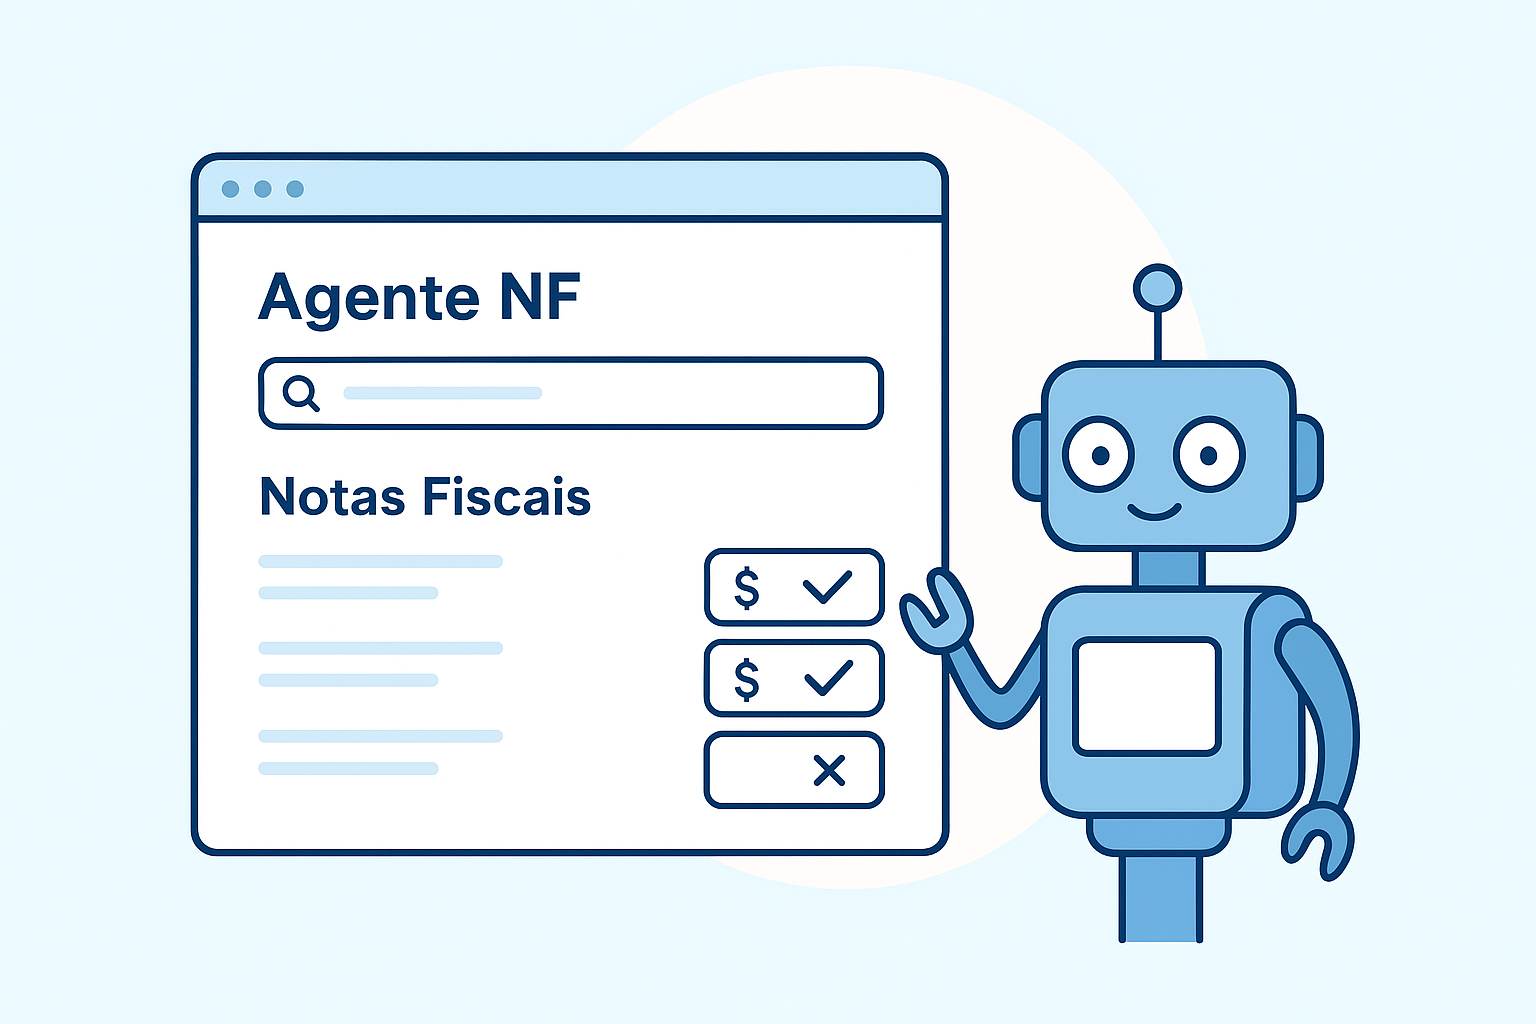

📌 Passo 1 — Instalar bibliotecas necessárias(OpenAI, langchain, pandas)


In [ ]:
# Passo 1 — Instalar bibliotecas via requirements.txt

# --- MONTAGEM DO GDRIVE ---
# É crucial montar o Google Drive ANTES de tentar ler o requirements.txt
# Se a célula de montagem (Passo 3 original) não estiver aqui, execute-a primeiro
# ou mova o código de montagem para cá.
from google.colab import drive
try:
    drive.mount('/content/drive', force_remount=True) # force_remount garante a montagem
    print("✅ Google Drive montado.")
except Exception as e:
    print(f"❌ Erro ao montar o Google Drive: {e}")

# --- CAMINHO PARA O requirements.txt ---
# Ajuste este caminho SE você mover o requirements.txt para outra pasta dentro do MyDrive
# Como está na raiz do MyDrive, o caminho é este:
requirements_path = '/content/drive/MyDrive/Colab Notebooks/desafio final/requirements.txt'

# --- INSTALAÇÃO ---
import os
if os.path.exists(requirements_path):
    print(f"\nInstalando dependências de: {requirements_path}")
    # Usa '-q' para uma instalação mais silenciosa, remova se quiser ver detalhes
    !pip install -r "$requirements_path" -q
    print("\n✅ Dependências instaladas!")
    print("⚠️ Lembre-se de REINICIAR O AMBIENTE DE EXECUÇÃO (Runtime -> Restart session / Reiniciar sessão)")
    print("   após a primeira instalação bem-sucedida para que as versões corretas sejam carregadas.")
else:
    print(f"\n❌ ERRO: Arquivo '{requirements_path}' não encontrado!")
    print("   Verifique se o arquivo 'requirements.txt' está na raiz do seu Google Drive ('Meu Drive')")
    print("   ou ajuste a variável 'requirements_path' nesta célula com o caminho correto.")

Mounted at /content/drive
✅ Google Drive montado.

Instalando dependências de: /content/drive/MyDrive/Colab Notebooks/desafio final/requirements.txt

✅ Dependências instaladas!
⚠️ Lembre-se de REINICIAR O AMBIENTE DE EXECUÇÃO (Runtime -> Restart session / Reiniciar sessão)
   após a primeira instalação bem-sucedida para que as versões corretas sejam carregadas.


📌 Passo 2 — Importar bibliotecas

In [ ]:
import pandas as pd
from langchain import OpenAI
from langchain_experimental.agents.agent_toolkits.csv.base import create_csv_agent
from langchain_experimental.agents import create_csv_agent
from langchain.llms import OpenAI
print("bibliotecas importadas com sucesso ✅")

bibliotecas importadas com sucesso ✅


📌 Passo 3 — Conectar ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
print("conectado ao Google Drive com sucesso!✅")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
conectado ao Google Drive com sucesso!✅


📌 Passo 4 — Descompactar arquivo ZIP


In [ ]:
import zipfile
import os

# Substitua pelo caminho completo do seu arquivo .zip no Google Drive
zip_file_path = '/content/drive/My Drive/Colab Notebooks/202401_NFs_Desafio_3.zip'

# Substitua pelo diretório onde você quer extrair os arquivos (pode ser no Drive ou em outro lugar)
extract_dir = '/content/drive/My Drive/Colab Notebooks/NotasFiscaisDescompactadas'

# Cria o diretório de destino se ele não existir
os.makedirs(extract_dir, exist_ok=True)

try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Arquivo '{zip_file_path}' descompactado com sucesso ✅ em '{extract_dir}'.")
except FileNotFoundError:
    print(f"Erro: Arquivo '{zip_file_path}' não encontrado. Verifique o caminho.")
except zipfile.BadZipFile:
    print(f"Erro: O arquivo '{zip_file_path}' não é um arquivo ZIP válido.")
except Exception as e:
    print(f"Ocorreu um erro durante a descompactação: {e}")

Arquivo '/content/drive/My Drive/Colab Notebooks/202401_NFs_Desafio_3.zip' descompactado com sucesso ✅ em '/content/drive/My Drive/Colab Notebooks/NotasFiscaisDescompactadas'.


📌 Passo 5 — Ler os CSVs

In [ ]:
import pandas as pd

# Caminhos para os dois arquivos
cabecalho_path = '/content/drive/MyDrive/Colab Notebooks/NotasFiscaisDescompactadas/202401_NFs_Cabecalho.csv'
itens_path = '/content/drive/MyDrive/Colab Notebooks/NotasFiscaisDescompactadas/202401_NFs_Itens.csv'

# Lendo os CSVs
df_cabecalho = pd.read_csv(cabecalho_path)
df_itens = pd.read_csv(itens_path)

# Mostrando as primeiras linhas
print("📄 Cabeçalho:✅")
display(df_cabecalho.head())

print("📄 Itens:✅")
display(df_itens.head())

📄 Cabeçalho:✅


,CHAVE DE ACESSO,MODELO,SÉRIE,NÚMERO,NATUREZA DA OPERAÇÃO,DATA EMISSÃO,EVENTO MAIS RECENTE,DATA/HORA EVENTO MAIS RECENTE,CPF/CNPJ Emitente,RAZÃO SOCIAL EMITENTE,...,UF EMITENTE,MUNICÍPIO EMITENTE,CNPJ DESTINATÁRIO,NOME DESTINATÁRIO,UF DESTINATÁRIO,INDICADOR IE DESTINATÁRIO,DESTINO DA OPERAÇÃO,CONSUMIDOR FINAL,PRESENÇA DO COMPRADOR,VALOR NOTA FISCAL
0,41240106267630001509550010035101291224888487,55 - NF-E EMITIDA EM SUBSTITUIÇÃO AO MODELO 1 ...,1,3510129,Outras Entradas - Dev Remessa Escola,2024-01-18 07:10:39,Autorização de Uso,2024-01-18 07:10:58,06267630001509,COMPANHIA BRASILEIRA DE EDUC. E SIST. DE ENS. ...,...,PR,CURITIBA,394429021965,COMANDO DA AERONAUTICA,PA,CONTRIBUINTE ISENTO,2 - OPERAÇÃO INTERESTADUAL,1 - CONSUMIDOR FINAL,"9 - OPERAÇÃO NÃO PRESENCIAL, OUTROS",522.50
1,50240129843878000170550010000025251000181553,55 - NF-E EMITIDA EM SUBSTITUIÇÃO AO MODELO 1 ...,1,2525,VENDA DE MERCADORIA FORA DO ESTADO,2024-01-26 11:24:42,Autorização de Uso,2024-01-26 11:24:43,29843878000170,V CALDI PEREIRA PECAS E SERVICOS DIESEL,...,MS,COXIM,9615848000108,4 BATALHAO LOGISTICO,RS,NÃO CONTRIBUINTE,2 - OPERAÇÃO INTERESTADUAL,1 - CONSUMIDOR FINAL,1 - OPERAÇÃO PRESENCIAL,499.00
2,50240112977901000117550010000051831659469117,55 - NF-E EMITIDA EM SUBSTITUIÇÃO AO MODELO 1 ...,1,5183,Venda de mercadorias,2024-01-22 11:01:09,Autorização de Uso,2024-01-22 10:01:09,12977901000117,MOSKO LTDA EPP,...,MS,CAMPO GRANDE,15461510000133,FUNDACAO UNIVERSIDADE FEDERAL DE MS,MS,NÃO CONTRIBUINTE,1 - OPERAÇÃO INTERNA,1 - CONSUMIDOR FINAL,0 - NÃO SE APLICA,337.50
3,35240161186490000157551000000170551435015613,55 - NF-E EMITIDA EM SUBSTITUIÇÃO AO MODELO 1 ...,100,17055,REMESSA - ENTREGA FUTURA,2024-01-30 16:15:22,Autorização de Uso,2024-01-30 16:15:25,61186490000157,EDITORA FTD S.A.,...,SP,SAO PAULO,378257000181,FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCACAO,DF,NÃO CONTRIBUINTE,2 - OPERAÇÃO INTERESTADUAL,1 - CONSUMIDOR FINAL,"9 - OPERAÇÃO NÃO PRESENCIAL, OUTROS",6712.16
4,35240134028316923228550010003691801935917886,55 - NF-E EMITIDA EM SUBSTITUIÇÃO AO MODELO 1 ...,1,369180,RETORNO DE MATERIAL DEPOSITADO EM ARMAZEM GERAL,2024-01-26 08:08:18,Autorização de Uso,2024-01-26 08:26:25,34028316923228,EMPRES BRASILEIRA DE CORREIOS E TELEGRAFOS,...,SP,CAJAMAR,378257000181,FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCACAO,DF,NÃO CONTRIBUINTE,2 - OPERAÇÃO INTERESTADUAL,1 - CONSUMIDOR FINAL,0 - NÃO SE APLICA,274.56


📄 Itens:✅


,CHAVE DE ACESSO,MODELO,SÉRIE,NÚMERO,NATUREZA DA OPERAÇÃO,DATA EMISSÃO,CPF/CNPJ Emitente,RAZÃO SOCIAL EMITENTE,INSCRIÇÃO ESTADUAL EMITENTE,UF EMITENTE,...,PRESENÇA DO COMPRADOR,NÚMERO PRODUTO,DESCRIÇÃO DO PRODUTO/SERVIÇO,CÓDIGO NCM/SH,NCM/SH (TIPO DE PRODUTO),CFOP,QUANTIDADE,UNIDADE,VALOR UNITÁRIO,VALOR TOTAL
0,41240106267630001509550010035101291224888487,55 - NF-E EMITIDA EM SUBSTITUIÇÃO AO MODELO 1 ...,1,3510129,Outras Entradas - Dev Remessa Escola,2024-01-18 07:10:39,06267630001509,COMPANHIA BRASILEIRA DE EDUC. E SIST. DE ENS. ...,9085104702,PR,...,"9 - OPERAÇÃO NÃO PRESENCIAL, OUTROS",1,COLECAO SPE EF1 4ANO VOL 1 AL,49019900,"Outros livros, brochuras e impressos semelhantes",2949,1.0,UNIDAD,522.5,522.5
1,50240129843878000170550010000025251000181553,55 - NF-E EMITIDA EM SUBSTITUIÇÃO AO MODELO 1 ...,1,2525,VENDA DE MERCADORIA FORA DO ESTADO,2024-01-26 11:24:42,29843878000170,V CALDI PEREIRA PECAS E SERVICOS DIESEL,284290777,MS,...,1 - OPERAÇÃO PRESENCIAL,1,LANTERNA TATERAL CARRETA LED,85122021,Luzes fixas para automóveis e outros ciclos,6403,4.0,UNIDAD,39.9,159.6
2,50240129843878000170550010000025251000181553,55 - NF-E EMITIDA EM SUBSTITUIÇÃO AO MODELO 1 ...,1,2525,VENDA DE MERCADORIA FORA DO ESTADO,2024-01-26 11:24:42,29843878000170,V CALDI PEREIRA PECAS E SERVICOS DIESEL,284290777,MS,...,1 - OPERAÇÃO PRESENCIAL,2,CINEMATICO RODO-AR,73071920,Acessórios moldados para tubos de aço,6403,4.0,PEÇA,75.0,300.0
3,50240129843878000170550010000025251000181553,55 - NF-E EMITIDA EM SUBSTITUIÇÃO AO MODELO 1 ...,1,2525,VENDA DE MERCADORIA FORA DO ESTADO,2024-01-26 11:24:42,29843878000170,V CALDI PEREIRA PECAS E SERVICOS DIESEL,284290777,MS,...,1 - OPERAÇÃO PRESENCIAL,3,ESPIRAL NYLON CABINE AMARELO,39173100,Tubos flexíveis podendo suportar uma pressão m...,6403,1.0,PEÇA,39.9,39.9
4,50240112977901000117550010000051831659469117,55 - NF-E EMITIDA EM SUBSTITUIÇÃO AO MODELO 1 ...,1,5183,Venda de mercadorias,2024-01-22 11:01:09,12977901000117,MOSKO LTDA EPP,284058734,MS,...,0 - NÃO SE APLICA,1,"AGUA MINERAL NATURAL, TIPO SEM GAS MATERIAL EM...",22011000,"Águas minerais e águas gaseificadas, não adici...",5405,9.0,GL,37.5,337.5


📌 Passo 6 — Criando Agente para o Cabeçalho
 🤖

In [ ]:
# --- Imports e configuração ---
import os
from google.colab import userdata # Importa a biblioteca para acessar os Secrets
from langchain_openai import ChatOpenAI
from langchain_experimental.agents import create_pandas_dataframe_agent
from langchain.agents import AgentExecutor # Importa o AgentExecutor
from langchain.memory import ConversationBufferMemory # <- memória importada

# --- CARREGA A CHAVE DE API DO SECRETS ---
# Certifique-se de que o Secret chamado 'OPENROUTER_API_KEY' existe e tem sua chave válida.
try:
    openrouter_api_key = userdata.get('OPENROUTER_API_KEY') # <-- USA O NOME CORRETO DO SECRET
    # Verifica se a chave foi carregada (não está vazia ou None)
    if not openrouter_api_key:
        raise ValueError("Chave 'OPENROUTER_API_KEY' não encontrada ou está vazia nos Secrets.")
    print("✅ Chave de API do OpenRouter carregada com sucesso dos Secrets.")
except Exception as e:
    print(f"❌ Erro ao carregar a chave 'OPENROUTER_API_KEY' dos Secrets: {e}")
    print("👉 Verifique se o Secret existe, tem o nome correto e possui um valor válido.")
    openrouter_api_key = "ERRO_AO_CARREGAR_CHAVE" # Define um valor de erro

# Cria a memória para o agente de cabeçalho
memory_cabecalho = ConversationBufferMemory(
    memory_key="chat_history",
    return_messages=True
)

# --- CONFIGURA O LLM USANDO A CHAVE DO SECRETS ---
# Ajusta a temperatura e tokens como na versão funcional
llm = ChatOpenAI(
    model="mistralai/mistral-7b-instruct",
    temperature=0.3, # <-- Ajustado
    max_tokens=512,  # <-- Ajustado
    api_key=openrouter_api_key, # <-- USA A CHAVE CARREGADA DO SECRETS (NÃO A HARDCODED)
    base_url="https://openrouter.ai/api/v1"
)

# Prompt atualizado com todas as colunas reais, mantendo estrutura enxuta
# (O prompt original já estava bom, apenas o copiamos)
prompt_cabecalho = """
Você é um agente inteligente especializado em responder perguntas sobre notas fiscais, usando os dados de cabeçalho.

Utilize exclusivamente as colunas do DataFrame abaixo:
- CHAVE DE ACESSO
- MODELO
- SÉRIE
- NÚMERO
- NATUREZA DA OPERAÇÃO
- DATA EMISSÃO
- EVENTO MAIS RECENTE
- DATA/HORA EVENTO MAIS RECENTE
- CPF/CNPJ Emitente
- RAZÃO SOCIAL EMITENTE
- INSCRIÇÃO ESTADUAL EMITENTE
- UF EMITENTE
- MUNICÍPIO EMITENTE
- CNPJ DESTINATÁRIO
- NOME DESTINATÁRIO
- UF DESTINATÁRIO
- INDICADOR IE DESTINATÁRIO
- DESTINO DA OPERAÇÃO
- CONSUMIDOR FINAL
- PRESENÇA DO COMPRADOR
- VALOR NOTA FISCAL

Instruções:
- Responda sempre em português, de forma clara e objetiva.
- Utilize os nomes das colunas exatamente como aparecem no DataFrame.
- Se a pergunta solicitar um valor total, data ou contagem, verifique a coluna correspondente.
- Se não encontrar a informação, responda: "Não encontrei essa informação nos dados disponíveis."
- Nunca invente informações e não assuma dados ausentes.

Você deve entender sinônimos como:
- "empresa", "emissor" → RAZÃO SOCIAL EMITENTE
- "cidade", "município" → MUNICÍPIO EMITENTE
- "valor da nota", "total" → VALOR NOTA FISCAL
- "cnpj", "documento" → CPF/CNPJ Emitente

- Responda de forma direta e concisa. Evite respostas longas ou explicações desnecessárias.
- After you have finished the task, output the final answer in the following format, and **only** in this format: Final Answer: <your answer in Portuguese>.
"""

# --- CRIA O AGENTE PANDAS (SEM KWARGS OBSOLETOS E SEM PREFIX AQUI) ---
# Garanta que df_cabecalho foi definido em uma célula anterior
try:
    pandas_agent_base = create_pandas_dataframe_agent(
        llm,
        df_cabecalho, # Garanta que este DataFrame esteja carregado
        verbose=True, # Mantém o verbose para depuração
        agent_executor_kwargs={"handle_parsing_errors": True} # Passa handle_parsing_errors aqui
        # Não passe allow_dangerous_code, memory ou prefix diretamente aqui
    )
except NameError:
      print("❌ Erro: DataFrame 'df_cabecalho' não foi definido. Execute a célula do Passo 5 primeiro.")
      pandas_agent_base = None

# --- CRIA O EXECUTOR COM MEMÓRIA E PROMPT (PREFIX) ---
# Só cria o executor se o agente base foi criado com sucesso
if pandas_agent_base:
    # A função create_pandas_dataframe_agent já retorna um AgentExecutor configurado.
    # Vamos apenas reconfigurar a memória e o prompt nele, se possível,
    # ou usar a abordagem mais moderna se a anterior não funcionar bem.

    # Tentativa de adicionar memória ao executor existente (pode não ser ideal com essa função)
    # pandas_agent_base.memory = memory_cabecalho # Esta linha pode não funcionar como esperado
    # pandas_agent_base.agent.llm_chain.prompt = ??? # Modificar o prompt aqui é mais complexo

    # Abordagem mais recomendada e explícita com AgentExecutor.from_agent_and_tools:
    agent_cabecalho_executor = AgentExecutor.from_agent_and_tools(
        agent=pandas_agent_base.agent, # Usa o agente interno
        tools=pandas_agent_base.tools, # Usa as ferramentas internas
        memory=memory_cabecalho,       # Adiciona a memória aqui
        verbose=True,
        handle_parsing_errors=True,    # Mantém o tratamento de erro
        max_iterations=3,
        max_execution_time=20,
        # O prompt_cabecalho NÃO é passado como 'prefix' aqui.
        # Ele já foi incorporado ao 'agent' interno pelo create_pandas_dataframe_agent.
    )

else:
    agent_cabecalho_executor = None


# --- Exemplo de uso ---
# Só executa se a chave foi carregada e o executor foi criado
if openrouter_api_key != "ERRO_AO_CARREGAR_CHAVE" and agent_cabecalho_executor:
  try:
      # O input para o AgentExecutor deve ser um dicionário com a chave "input"
      resposta = agent_cabecalho_executor.invoke({
          "input": "Quantas notas fiscais foram emitidas?",
          "chat_history": [] # Passa um histórico vazio inicial
      })
      print("\n--- Resposta do Agente ---")
      # A resposta do AgentExecutor geralmente está na chave 'output'
      print(resposta.get('output', 'Não foi possível obter a saída da resposta.'))
  except Exception as e:
      print(f"\n❌ Ocorreu um erro ao executar o agente: {e}")
      print("   Verifique a chave API, conta OpenRouter (limites/créditos) e se o DataFrame está correto.")
elif not agent_cabecalho_executor and openrouter_api_key != "ERRO_AO_CARREGAR_CHAVE":
    print("\n⚠️ Agente não executado porque o DataFrame 'df_cabecalho' não foi carregado corretamente.")
else:
    print("\n⚠️ Agente não executado devido a erro no carregamento da chave API.")

✅ Chave de API do OpenRouter carregada com sucesso dos Secrets.


> Entering new AgentExecutor chain...
 <s>Thought: To determine the number of invoices issued, I need to count the number of rows in the dataframe `df`.
Action: python_repl_ast
Action Input: len(df)100 The number of rows in the dataframe is 100, which corresponds to the number of invoices issued.
Final Answer: 100 notas fiscais foram emitidas. [s]

> Finished chain.

--- Resposta do Agente ---
100 notas fiscais foram emitidas. [s]


📌 Passo 7 — Criando Agente para os Itens 🤖

In [ ]:
# --- Imports e configuração (Garante que foram importados antes) ---
import os
from google.colab import userdata
from langchain_openai import ChatOpenAI
from langchain_experimental.agents import create_pandas_dataframe_agent
# AgentExecutor não é importado aqui nesta abordagem mais simples

# --- CARREGA A CHAVE DE API DO SECRETS (Assume que já foi carregada) ---
# Garante que a variável 'openrouter_api_key' existe e é válida
if 'openrouter_api_key' not in locals() or openrouter_api_key == "ERRO_AO_CARREGAR_CHAVE":
    print("⚠️ Chave API não carregada corretamente. Tente executar a Célula 2.1 novamente.")
    # Define um valor padrão inválido para evitar erros posteriores, mas o agente não funcionará
    openrouter_api_key = "CHAVE_NAO_CARREGADA"

# --- CONFIGURA O LLM USANDO A CHAVE DO SECRETS ---
llm_itens = ChatOpenAI( # Pode usar 'llm' se preferir, desde que seja consistente
    model="mistralai/mistral-7b-instruct",
    temperature=0.3, # <-- Mantém temperatura ajustada
    max_tokens=512,  # <-- Mantém tokens ajustados
    api_key=openrouter_api_key, # <-- USA A CHAVE CARREGADA DO SECRETS
    base_url="https://openrouter.ai/api/v1"
)

# Prompt refinado com colunas reais do CSV e lógica clara
prompt_itens = """
Você é um agente especialista em análise de itens de notas fiscais.

Utilize exclusivamente as seguintes colunas do DataFrame:
- CHAVE DE ACESSO
- MODELO
- SÉRIE
- NÚMERO
- NATUREZA DA OPERAÇÃO
- DATA EMISSÃO
- CPF/CNPJ Emitente
- RAZÃO SOCIAL EMITENTE
- INSCRIÇÃO ESTADUAL EMITENTE
- UF EMITENTE
- PRESENÇA DO COMPRADOR
- NÚMERO PRODUTO
- DESCRIÇÃO DO PRODUTO/SERVIÇO
- CÓDIGO NCM/SH
- NCM/SH (TIPO DE PRODUTO)
- CFOP
- QUANTIDADE
- UNIDADE
- VALOR UNITÁRIO
- VALOR TOTAL

Instruções:
- Responda sempre em português, de forma clara e objetiva.
- Quando perguntado sobre "produto mais vendido", use a maior QUANTIDADE e devolva a DESCRIÇÃO DO PRODUTO/SERVIÇO correspondente.
- Quando perguntado sobre "produto mais caro", utilize o maior VALOR UNITÁRIO.
- Quando perguntarem sobre “valor total de vendas de um produto”, filtre pela DESCRIÇÃO DO PRODUTO/SERVIÇO e some o VALOR TOTAL.
- Utilize os nomes das colunas exatamente como aparecem.
- Se não encontrar a informação, responda: "Não encontrei essa informação nos dados disponíveis."
- Nunca invente informações nem use suposições.
- Sempre responda no formato: Final Answer: <sua resposta em português e objetiva>.

Você deve entender sinônimos como:
- "produto", "item", "mercadoria" → DESCRIÇÃO DO PRODUTO/SERVIÇO
- "quantidade", "unidades vendidas", "volume" → QUANTIDADE
- "preço", "valor", "custo unitário" → VALOR UNITÁRIO
- "valor total", "vendas totais" → VALOR TOTAL
- "ncm" → CÓDIGO NCM/SH
- "número de notas" → CHAVE DE ACESSO
"""

# --- CRIAÇÃO DO AGENTE COM DATAFRAME DE ITENS (Abordagem Original Simplificada) ---
agent_itens_executor = None # Inicializa
if openrouter_api_key != "CHAVE_NAO_CARREGADA":
    try:
        # Verifica se df_itens existe
        if 'df_itens' not in locals():
             raise NameError("DataFrame 'df_itens' não foi definido.")

        # Cria o agente/executor diretamente (como no seu código original que funcionou uma vez)
        # Passa handle_parsing_errors=True para tentar recuperar de erros de formato
        agent_itens_executor = create_pandas_dataframe_agent(
            llm=llm_itens,
            df=df_itens,
            verbose=True,
            allow_dangerous_code=True, # Mantido, pois funcionou antes
            handle_parsing_errors=True, # Mantido e importante para este erro!
            prefix=prompt_itens,
            max_iterations=3,
            max_execution_time=20
            # A memória não é usada neste agente
        )
        print("✅ Executor do agente de itens criado com sucesso (método simplificado).")

    except NameError as ne:
        print(f"❌ Erro ao criar agente itens: {ne}. Execute a célula do Passo 5 primeiro.")
    except Exception as e:
        print(f"❌ Erro inesperado ao criar o agente de itens: {e}")
else:
    print("⚠️ Executor do agente itens não criado devido a erro na chave API.")


# --- Teste de exemplo ---
if agent_itens_executor:
  try:
      resposta_itens = agent_itens_executor.invoke("Qual foi o produto mais vendido?")
      print("\n--- Resposta do Agente de Itens ---")
      # Verifica se a resposta contém 'output' antes de imprimir
      if isinstance(resposta_itens, dict) and 'output' in resposta_itens:
            print(resposta_itens['output'])
      else:
            # Se não encontrar 'output', imprime a resposta bruta para depuração
            print(f"Resposta inesperada do agente: {resposta_itens}")

  except Exception as e:
      print(f"\n❌ Ocorreu um erro ao executar o agente de itens: {e}")
      # Imprime o traceback completo para ajudar na depuração, se necessário
      # import traceback
      # traceback.print_exc()
else:
     print("\n⚠️ Executor do agente de itens não executado.")

/usr/local/lib/python3.12/dist-packages/langchain_experimental/agents/agent_toolkits/pandas/base.py:242: UserWarning: Received additional kwargs {'allow_dangerous_code': True, 'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


✅ Executor do agente de itens criado com sucesso (método simplificado).


> Entering new AgentExecutor chain...
 Thought: Preciso encontrar o produto com a maior quantidade vendida.
Action: python_repl_ast
Action Input: df.loc[df['QUANTIDADE'].idxmax(), 'DESCRIÇÃO DO PRODUTO/SERVIÇO']DIPIFARMA INJETAVEL(DIPIRONA MONOIDR 500MG/ML) 2ML Final Answer: O produto mais vendido foi DIPIFARMA INJETAVEL(DIPIRONA MONOIDR 500MG/ML) 2ML.

> Finished chain.

--- Resposta do Agente de Itens ---
O produto mais vendido foi DIPIFARMA INJETAVEL(DIPIRONA MONOIDR 500MG/ML) 2ML.


📌 Passo 8: Interface Web - Chat Online 🌎📡

✅ Authtoken do ngrok configurado.💸💸


In [ ]:

!pip install flask pyngrok
from pyngrok import ngrok

# Configurar authtoken do ngrok diretamente
ngrok.set_auth_token("2zfJIKxUNZCpKKVicytyqqkU2SU_85f3HfvrfniVgW5k5A16D")

print("✅ Authtoken do ngrok configurado.💸💸")
!pip install flask pyngrok

from flask import Flask, request, jsonify, render_template_string
from pyngrok import ngrok
import os

html_template = """
<!DOCTYPE html>
<html lang="pt-br">
<head>
    <meta charset="UTF-8">
        <title>🤖 Chat - Agente Notas Fiscais</title>
            <link rel="icon" href="https://cdn-icons-png.flaticon.com/512/4712/4712109.png" type="image/png">
                <style>
                        body {
                                    font-family: Arial, sans-serif;
                                                background: #f2f2f2;
                                                            display: flex;
                                                                        flex-direction: column;
                                                                                    align-items: center;
                                                                                                margin: 0;
                                                                                                            padding: 0;
                                                                                                                    }
                                                                                                                            h2 {
                                                                                                                                        color: #333;
                                                                                                                                                    margin-top: 20px;
                                                                                                                                                            }
                                                                                                                                                                    #chat {
                                                                                                                                                                                width: 90%;
                                                                                                                                                                                            max-width: 600px;
                                                                                                                                                                                                        height: 500px;
                                                                                                                                                                                                                    background: #fff;
                                                                                                                                                                                                                                border: 1px solid #ccc;
                                                                                                                                                                                                                                            border-radius: 10px;
                                                                                                                                                                                                                                                        padding: 10px;
                                                                                                                                                                                                                                                                    overflow-y: scroll;
                                                                                                                                                                                                                                                                                box-shadow: 0 0 10px rgba(0,0,0,0.1);
                                                                                                                                                                                                                                                                                            margin-bottom: 10px;
                                                                                                                                                                                                                                                                                                    }
                                                                                                                                                                                                                                                                                                            .mensagem {
                                                                                                                                                                                                                                                                                                                        margin: 10px 0;
                                                                                                                                                                                                                                                                                                                                    padding: 10px;
                                                                                                                                                                                                                                                                                                                                                border-radius: 10px;
                                                                                                                                                                                                                                                                                                                                                            max-width: 80%;
                                                                                                                                                                                                                                                                                                                                                                        clear: both;
                                                                                                                                                                                                                                                                                                                                                                                }
                                                                                                                                                                                                                                                                                                                                                                                        .usuario {
                                                                                                                                                                                                                                                                                                                                                                                                    background-color: #d1e7dd;
                                                                                                                                                                                                                                                                                                                                                                                                                float: right;
                                                                                                                                                                                                                                                                                                                                                                                                                            text-align: right;
                                                                                                                                                                                                                                                                                                                                                                                                                                    }
                                                                                                                                                                                                                                                                                                                                                                                                                                            .robo {
                                                                                                                                                                                                                                                                                                                                                                                                                                                        background-color: #f8d7da;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                    float: left;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                text-align: left;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        }
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                form {
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            width: 90%;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         max-width: 600px;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     display: flex;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 justify-content: space-between;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         }
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 input[type="text"] {
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             flex: 1;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         padding: 10px;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     font-size: 16px;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 border-radius: 5px;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             border: 1px solid #ccc;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     }
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             button {
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         padding: 10px 15px;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     margin-left: 10px;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 font-size: 16px;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             background-color: #333;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         color: white;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     border: none;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 border-radius: 5px;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        }
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            </style>
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            </head>
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            <body>
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                <h2>🤖 Agente Notas Fiscais</h2>
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    <div id="chat"></div>
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       <form id="form">
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               <input type="text" id="mensagem" placeholder="Digite sua pergunta...">
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       <button type="submit">Enviar</button>
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           </form>

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               <script>
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       const form = document.getElementById('form');
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               const chat = document.getElementById('chat');

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       function adicionarMensagem(texto, classe) {
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   const div = document.createElement('div');
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               div.classList.add('mensagem', classe);
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           div.textContent = texto;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       chat.appendChild(div);
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   chat.scrollTop = chat.scrollHeight;
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           }

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   form.addEventListener('submit', async (e) => {
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               e.preventDefault();
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           const input = document.getElementById('mensagem');
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       const mensagem = input.value.trim();
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   if (!mensagem) return;

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               adicionarMensagem("Você: " + mensagem, 'usuario');

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           const resposta = await fetch('/chat', {
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           method: 'POST',
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           headers: {'Content-Type': 'application/json'},
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           body: JSON.stringify({mensagem})
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        }).then(r => r.json());

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    adicionarMensagem("Agente 🤖: " + resposta.resposta, 'robo');
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                input.value = '';
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        });
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            </script>
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            </body>
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            </html>
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            """

# Flask app
app = Flask(__name__)

@app.route("/")
def index():
    return render_template_string(html_template)

@app.route("/chat", methods=["POST"])
def chat():
    data = request.get_json()
    mensagem = data.get("mensagem", "")
    resultado = agent_itens.invoke(mensagem)

    if isinstance(resultado, dict):
        resposta_texto = resultado.get("output", str(resultado))
    else:
        resposta_texto = str(resultado)

    return jsonify({"resposta": resposta_texto})

# ngrok
# Get the authtoken from the environment or a variable
authtoken = os.environ.get("NGROK_AUTH_TOKEN") # Use the provided token

# Configure ngrok with the authtoken immediately before connecting
if authtoken:
    ngrok.set_auth_token(authtoken)
    print("Ngrok authtoken set successfully.")
else:
    print("Ngrok authtoken not found in environment variables.")


# Connect to ngrok
public_url = ngrok.connect(5000)
print(f"🔗 Acesse aqui o chat: {public_url}")

app.run(port=5000)

✅ Authtoken do ngrok configurado.💸💸
Ngrok authtoken not found in environment variables.
🔗 Acesse aqui o chat: NgrokTunnel: "https://b3e509e81235.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [22/Oct/2025 23:05:00] "GET / HTTP/1.1" 200 -




> Entering new AgentExecutor chain...
 Thought: Preciso encontrar a maior QUANTIDADE no DataFrame e retornar a DESCRIÇÃO DO PRODUTO/SERVIÇO correspondente.
Action: python_repl_ast
Action Input: df.loc[df['QUANTIDADE'].idxmax(), 'DESCRIÇÃO DO PRODUTO/SERVIÇO']DIPIFARMA INJETAVEL(DIPIRONA MONOIDR 500MG/ML) 2ML

ERROR:__main__:Exception on /chat [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/langchain/agents/agent.py", line 1166, in _iter_next_step
    output = self.agent.plan(
             ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/langchain/agents/agent.py", line 397, in plan
    for chunk in self.runnable.stream(inputs, config={"callbacks": callbacks}):
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/langchain_core/runnables/base.py", line 2875, in stream
    yield from self.transform(iter([input]), config, **kwargs)
  File "/usr/local/lib/python3.12/dist-packages/langchain_core/runnables/base.py", line 2862, in transform
    yield from self._transform_stream_with_config(
  File "/usr/local/lib/python3.12/dist-packages/langchain_core/runnables/base.py", line 1881, in _transform_stream_with_config
    chunk: Output = context.run(next, iterator)  # ty

**Instruções:**

1.  Execute o código acima.
2.  Após a execução, o `ngrok` CLI irá iniciar e imprimir informações sobre o túnel.
3.  Localize a linha que começa com `Forwarding` e copie a URL pública (geralmente algo como `https://<alguns-caracteres>.ngrok-free.app`).
4.  Use esta URL copiada para acessar a interface web do chat.

Observe que esta célula continuará em execução enquanto o túnel ngrok estiver ativo. Para parar o túnel, interrompa a execução desta célula. Você precisará executar esta célula novamente para iniciar um novo túnel se a sessão for encerrada.

📊Passo 9: Funções e lógicas para gráficos, tabelas e relatórios

In [ ]:
pip install matplotlib

In [ ]:
# 📊 Funções e lógica para gráficos, tabelas e relatórios
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

def responder_visual(pergunta):
    p = pergunta.lower()

    # Produtos mais vendidos
    if "gráfico" in p and "produto" in p:
        top = df_itens.groupby("DESCRIÇÃO DO PRODUTO/SERVIÇO")["QUANTIDADE"].sum().nlargest(10)
        top.plot(kind='bar', figsize=(10,5), color='skyblue')
        plt.title("Top Produtos Mais Vendidos")
        plt.xticks(rotation=45, ha='right')
        plt.show()

    # Vendas por mês
    elif "gráfico" in p and "mês" in p:
        df_cabecalho["DATA EMISSÃO"] = pd.to_datetime(df_cabecalho["DATA EMISSÃO"], errors="coerce")
        vendas = df_cabecalho.groupby(df_cabecalho["DATA EMISSÃO"].dt.to_period("M"))["VALOR NOTA FISCAL"].sum()
        vendas.index = vendas.index.astype(str)
        vendas.plot(kind='line', marker='o', figsize=(10,5), color='orange')
        plt.title("Vendas por Mês")
        plt.grid(True)
        plt.show()

    # Relatório geral
    elif "relatório" in p:
        rel = df_itens.groupby("DESCRIÇÃO DO PRODUTO/SERVIÇO").agg(
            quantidade_total=("QUANTIDADE", "sum"),
            valor_total=("VALOR TOTAL", "sum")
        ).sort_values(by="quantidade_total", ascending=False)
        display(rel.head(15))

    # Caso não seja gráfico/relatório → usa os agentes já criados
    else:
        if "produto" in p:
            resp = agent_itens.invoke(pergunta)
        else:
            resp = agent_cabecalho.invoke(pergunta)
        print(resp["output"])

# 🔹 Exemplo de uso:
# responder_visual("Mostrar gráfico dos produtos mais vendidos")
# responder_visual("Gerar relatório de vendas")
# responder_visual("Qual foi o produto mais vendido?")

Chamar função passo 9:

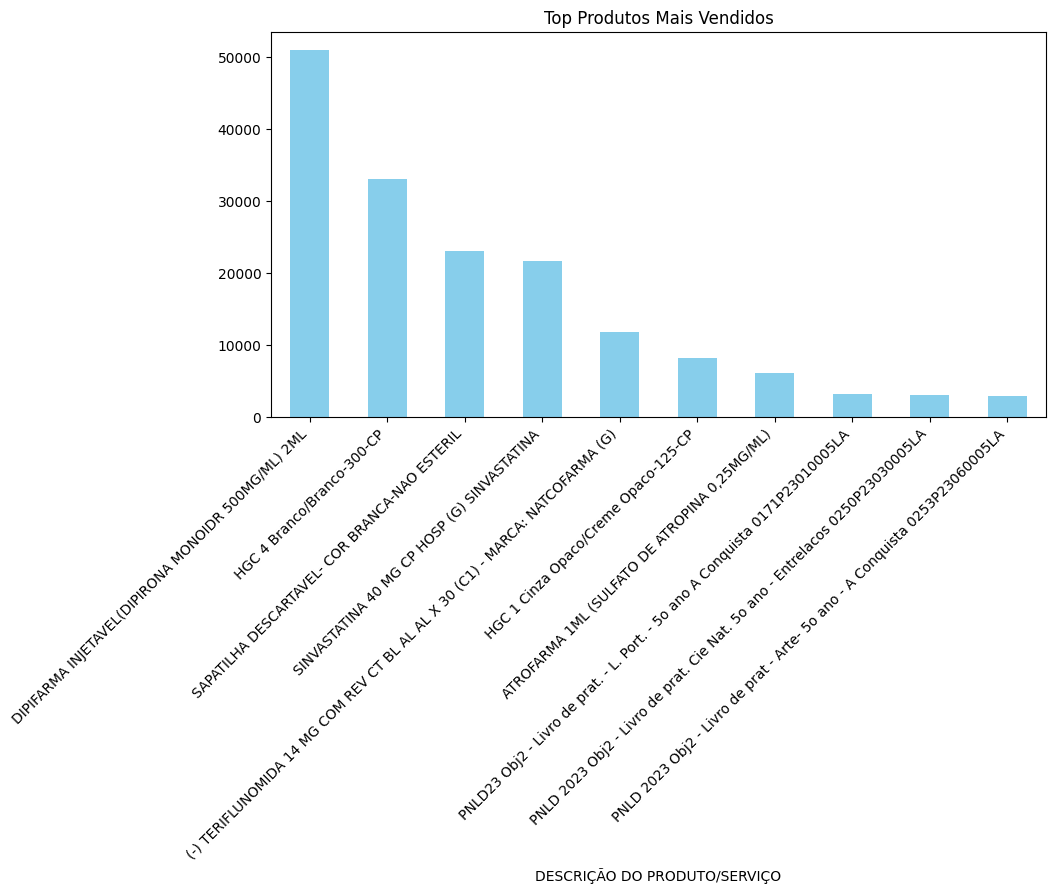

,quantidade_total,valor_total
DESCRIÇÃO DO PRODUTO/SERVIÇO,,
DIPIFARMA INJETAVEL(DIPIRONA MONOIDR 500MG/ML) 2ML,51000.0,51000.00
HGC 4 Branco/Branco-300-CP,33000.0,985050.00
SAPATILHA DESCARTAVEL- COR BRANCA-NAO ESTERIL,23000.0,1840.00
SINVASTATINA 40 MG CP HOSP (G) SINVASTATINA,21600.0,2808.00
(-) TERIFLUNOMIDA 14 MG COM REV CT BL AL AL X 30 (C1) - MARCA: NATCOFARMA (G),11790.0,26881.20
HGC 1 Cinza Opaco/Creme Opaco-125-CP,8125.0,307368.75
"ATROFARMA 1ML (SULFATO DE ATROPINA 0,25MG/ML)",6000.0,5100.00
PNLD23 Obj2 - Livro de prat. - L. Port. - 5o ano A Conquista 0171P23010005LA,3142.0,16652.60
PNLD 2023 Obj2 - Livro de prat. Cie Nat. 5o ano - Entrelacos 0250P23030005LA,2943.0,8299.26


In [ ]:
%matplotlib inline

# Testar gráfico
responder_visual("Mostrar gráfico dos produtos mais vendidos")

# Testar relatório
responder_visual("Gerar relatório de vendas")